<a href="https://colab.research.google.com/github/marudesousa/DataScienceII/blob/main/Desempe%C3%B1oEstudiantil_DeSousa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Rendimiento Académico Estudiantil

La vida de un estudiante puede estar influenciada, de manera positiva o negativa, por diversos factores, incluyendo hábitos de estudio, asistencia, apoyo familiar, acceso a recursos y estilo de vida. En este proyecto, realizaremos un análisis exploratorio para comprender la relación entre estas variables y el desempeño académico. A través de visualizaciones y transformaciones de datos, identificaremos patrones y correlaciones.

Posteriormente, el plan es construir un modelo de regresión para predecir el puntaje final del examen, permitiendo estimar el rendimiento de los estudiantes en función de sus características. Este estudio busca proporcionar información valiosa para optimizar estrategias educativas y mejorar el desempeño académico.



## Contexto Analítico e Hipótesis


El rendimiento académico no depende únicamente del esfuerzo individual, sino de una combinación de factores como hábitos de estudio, asistencia, apoyo familiar y acceso a recursos. Identificar cuáles de estas variables tienen mayor impacto permitirá a educadores, familias y responsables del sistema educativo optimizar el entorno de aprendizaje, brindando mejores oportunidades a los estudiantes para su futuro académico y profesional.

Se espera que aspectos como el tiempo de estudio y el apoyo familiar mejoren las calificaciones, mientras que la falta de sueño o la ansiedad puedan afectarlas negativamente. A través del análisis de datos, buscaremos validar estas relaciones y proporcionar información clave para mejorar estrategias educativas.

##Preguntas de interés



*   ¿Qué características tienen los estudiantes con mejores calificaciones?
*   ¿Cómo afecta la asistencia y la tutoría al desempeño?
*   ¿El acceso a Internet y materiales impacta directamente en el rendimiento?
*   ¿Hábitos saludables como dormir suficientes horas y hacer actividad física, mejoran el desempeño?
*   Estudiantes que se rodean de pares que tengan una influencia positiva o padres involucrados, ¿tienen realmente un mejor desempeño?

##Objetivo
*  Aprender si es posible predecir el desempeño de los estudiantes en base a las demás variables mencionadas, usando "exam_score" como valor a predecir



# Presentación Ejecutiva



Link a la presentación:

https://1drv.ms/p/c/12269ebe25ce49ad/Eb47vxiFDq5Aj78QX44gBCkBWWyoZZHAjasdHcn4BserIw?e=oIqjcC

##Lectura de Datos

In [ ]:
# Importando librerías
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Leer el archivo
file_path = "/content/drive/My Drive/StudentPerformanceFactors.csv"
df = pd.read_csv(file_path)
print(df.sample(10))

      Hours_Studied  Attendance Parental_Involvement Access_to_Resources  \
146              13          65                  Low                High   
2377             12          74                 High                 Low   
2628             17          76               Medium                High   
5486             21          81               Medium              Medium   
2546             12          96                 High                High   
3423             23          66                 High                 Low   
3249              9          76                  Low                High   
2475             24          99                 High              Medium   
3999             22          70               Medium                High   
5563             24          91                  Low              Medium   

     Extracurricular_Activities  Sleep_Hours  Previous_Scores  \
146                          No            6               99   
2377                        Yes  

##Glosario De Variables

**"Variable: Descripción,Tipo de Dato"**


**Hours_Studied:** Número de horas dedicadas al estudio por semana, INT (numérico)

**Attendance:** Porcentaje de clases asistidas, INT (numérico)

**Parental_Involvement:** Nivel de participación de los padres en la educación del estudiante (Bajo, Medio, Alto), STRING (categórico)

**Access_to_Resources:** Disponibilidad de recursos educativos (Bajo, Medio, Alto), STRING (categórico)

**Extracurricular_Activities:** Participación en actividades extracurriculares (Sí, No), BOOLEAN

**Sleep_Hours:** Número promedio de horas de sueño por noche, INT (numérico)

**Previous_Scores:** Calificaciones obtenidas en exámenes anteriores, INT (numérico)

**Motivation_Level:** Nivel de motivación del estudiante (Bajo, Medio, Alto), STRING (categórico)

**Internet_Access:** Disponibilidad de acceso a Internet (Sí, No), BOOLEAN

**Tutoring_Sessions:** Número de sesiones de tutoría asistidas por mes, INT (numérico)

**Family_Income:** Nivel de ingresos familiares (Bajo, Medio, Alto), STRING (categórico)

**Teacher_Quality** Calidad de los profesores (Baja, Media, Alta), STRING (categórico)

**School_Type:** Tipo de escuela asistida (Pública, Privada), STRING (categórico)

**Peer_Influence:** Influencia de los compañeros en el rendimiento académico (Positiva, Neutral, Negativa), STRING (categórico)

**Physical_Activity:** Número promedio de horas de actividad física por semana, INT (numérico)

**Learning_Disabilities:** Presencia de discapacidades de aprendizaje (Sí, No), BOOLEAN

**Parental_Education_Level:** Nivel educativo más alto alcanzado por los padres (Secundaria, Universidad, Postgrado), STRING (categórico)

**Distance_from_Home** Distancia desde casa a la escuela (Cerca, Moderada, Lejos), STRING (categórico)

**Gender:** Género del estudiante (Masculino, Femenino), STRING (categórico)

**Exam_Score:** Puntaje final del examen, INT (numérico)
```


In [ ]:
#Vemos la cantidad de filas y columnas
df.shape

(6607, 20)

In [ ]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [ ]:
#Revisamos si hay valores nulos
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


##Limpieza y transformación de datos

Solo 3 columnas tienen datos nulos, y en un porcentaje muy bajo. Para evitar borrar esas filas, reemplazaremos los nulos con la moda, teniendo en cuenta que al ser muy poca cantidad no deberia cambiar nuestro modelo ni afectarlo negativamente.

In [ ]:
# Reemplazar valores nulos con la moda
missing_col = ['Parental_Education_Level', 'Distance_from_Home', 'Teacher_Quality']

for col in missing_col:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

    #Comprobamos que nos hayamos deshecho de los valores
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [ ]:
#Revisamos si hay duplicados
df.duplicated().sum()

np.int64(0)

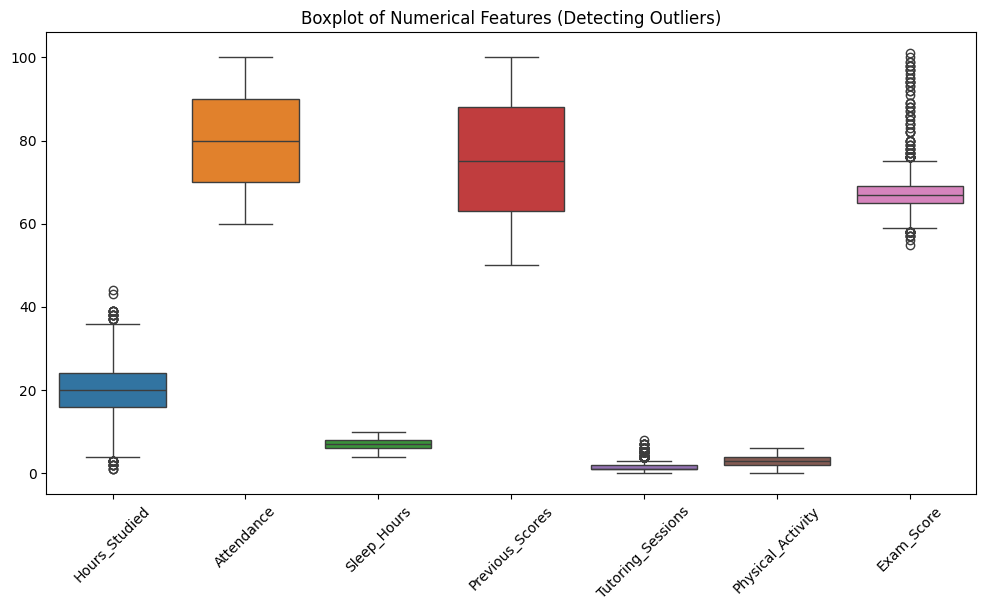

In [ ]:
#Separo variables numéricas de objetos/texto
object_features = df.select_dtypes(include='object')
numerical_features = df.select_dtypes(exclude='object')

#Hago una visual para ver cuales parecen tener outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=numerical_features)
plt.xticks(rotation=45)
plt.title("Boxplot of Numerical Features (Detecting Outliers)")
plt.show()

Ignorando "Exam_Score" que no es un outlier real, ya que los puntajes sabemos que deberian poder ir de 0 a 100, le damos una mirada mas cerca a las que si parecian tener outliers

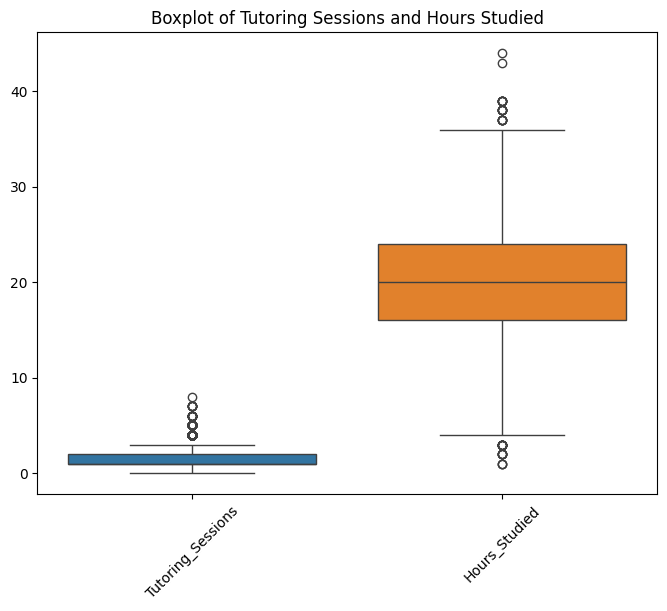

In [ ]:
#Boxplot para variables numéricas con outliers

columns_to_plot = ["Tutoring_Sessions", "Hours_Studied"]

# Ensure the columns exist in the dataset
numerical_features2 = df[columns_to_plot]

# Create the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=numerical_features2)
plt.xticks(rotation=45)
plt.title("Boxplot of Tutoring Sessions and Hours Studied")
plt.show()

Efectivamente hubo pocas personas que tuvieron muchas mas horas de tutoría que los demás estudiantes, y lo mismo se observa para horas de estudio, donde algunos estudiaron mucho menos que otros, y unos tienen muchas mas horas, siendo estos los outliers observados

In [ ]:
#Voy a usar Z-score para detectar y borrar outliers excluyendo 'Exam_Score'
numerical_features = df.select_dtypes(include=['int64', 'float64']).drop(columns=['Exam_Score'])

#Outliers
z = np.abs((numerical_features - numerical_features.mean()) / numerical_features.std())
threshold = 3
df = df[(z < threshold).all(axis=1)]


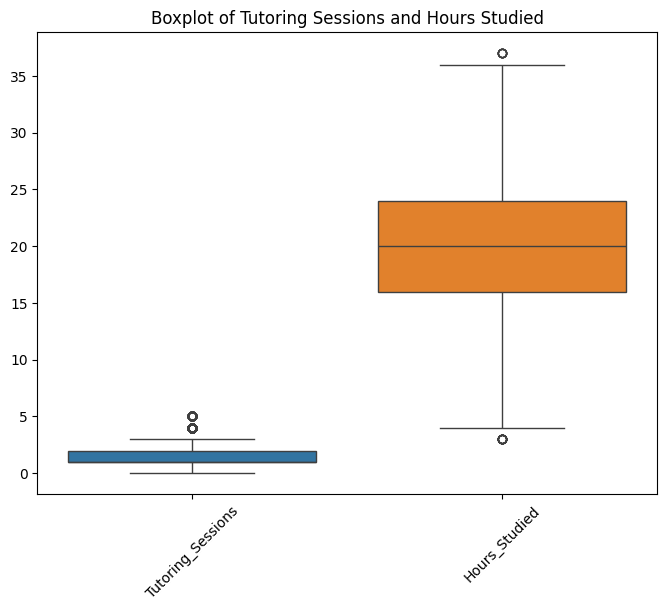

In [ ]:
#Creo otro boxplot para verificar que se hayan borrado outliers
columns_to_plot = ["Tutoring_Sessions", "Hours_Studied"]
numerical_features3 = df[columns_to_plot]

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=numerical_features3)
plt.xticks(rotation=45)
plt.title("Boxplot of Tutoring Sessions and Hours Studied")
plt.show()

Hay bastantes menos outliers, mas adelante también cambiaré los datos categoricos a datos numericos para que sea mas facil para el modelo predecir.


# **Análisis Exploratorio de datos**



Análisis Univariado

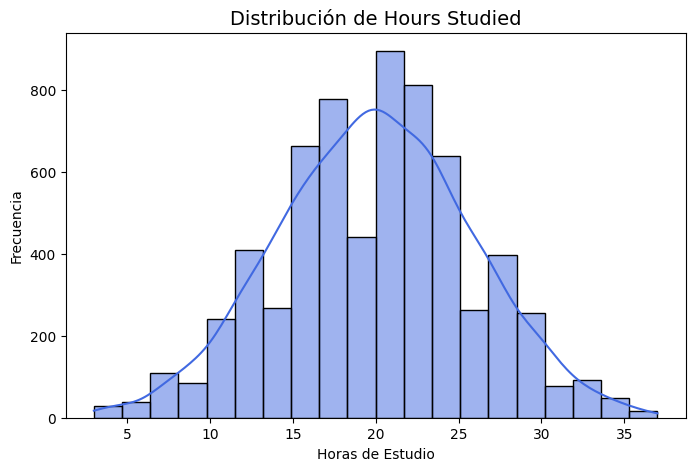

In [ ]:
# Histograma de Horas de estudio - Análisis univariado
plt.figure(figsize=(8, 5))
sns.histplot(df["Hours_Studied"], bins=20, kde=True, color="royalblue")
plt.title("Distribución de Hours Studied", fontsize=14)
plt.xlabel("Horas de Estudio")
plt.ylabel("Frecuencia")
plt.show()

**Podemos observar que la mayoria de los alumnos se mantiene por la mitad, estudiando entre 20 y 23 horas**

<ipython-input-36-bd9f65763280>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Motivation_Level", palette="viridis", order=["Low", "Medium", "High"])


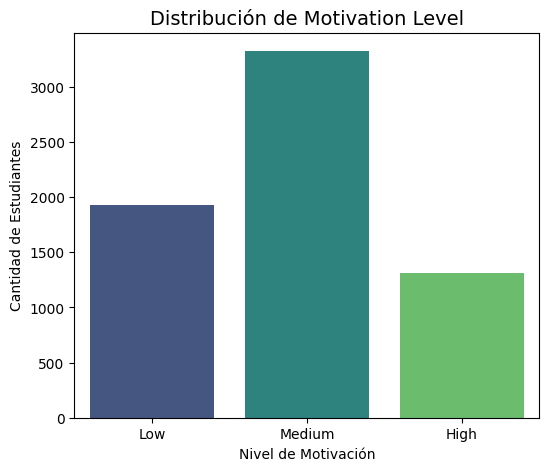

In [ ]:
# Countplot de Motivación - Análisis univariado
plt.figure(figsize=(6, 5))
sns.countplot(data=df, x="Motivation_Level", palette="viridis", order=["Low", "Medium", "High"])
plt.title("Distribución de Motivation Level", fontsize=14)
plt.xlabel("Nivel de Motivación")
plt.ylabel("Cantidad de Estudiantes")
plt.show()

**La mayoria de los alumnos mantiene un nivel de motivación "medio" antes de los exámenes. Los mas motivados son minoria.**

**Análisis bivariado**

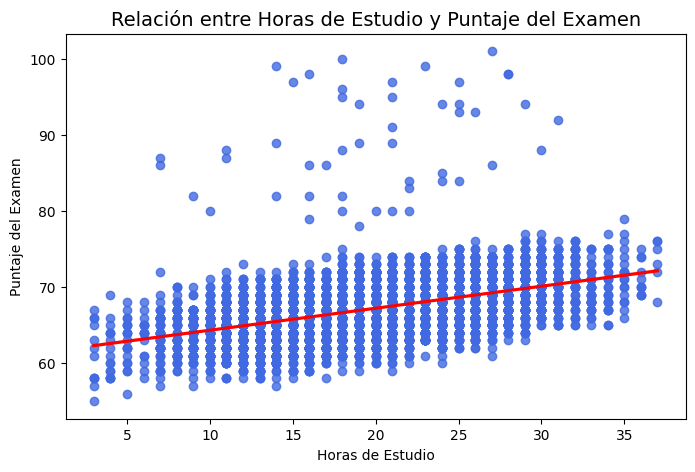

In [ ]:
# Scatterplot de Hours_Studied vs Exam_Score con línea de tendencia
plt.figure(figsize=(8, 5))
sns.regplot(x="Hours_Studied", y="Exam_Score", data=df, scatter_kws={"color": "royalblue"}, line_kws={"color": "red"})
plt.title("Relación entre Horas de Estudio y Puntaje del Examen", fontsize=14)
plt.xlabel("Horas de Estudio")
plt.ylabel("Puntaje del Examen")
plt.show()

**Aunque hay estudiantes que con menos de 15 horas de estudio obtuvieron un buenas calificaciones, se puede observar una correlación positiva en la que a medida que la mayoria estudia mas horas, obtienen mejores calificaciones**

<ipython-input-38-a8ac5893a13a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Motivation_Level", y="Hours_Studied", data=df, palette="viridis", order=["Low", "Medium", "High"])


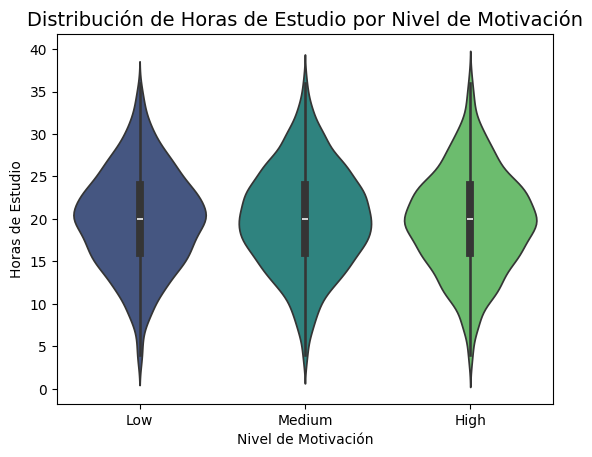

In [ ]:
sns.violinplot(x="Motivation_Level", y="Hours_Studied", data=df, palette="viridis", order=["Low", "Medium", "High"])
plt.title("Distribución de Horas de Estudio por Nivel de Motivación", fontsize=14)
plt.xlabel("Nivel de Motivación")
plt.ylabel("Horas de Estudio")
plt.show()

**Parece bastante parejo, estar altamente motivado no les dió una ventaja marcada.**

<ipython-input-39-421c49a0c8a0>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Gender', y='Exam_Score', palette='Set2')


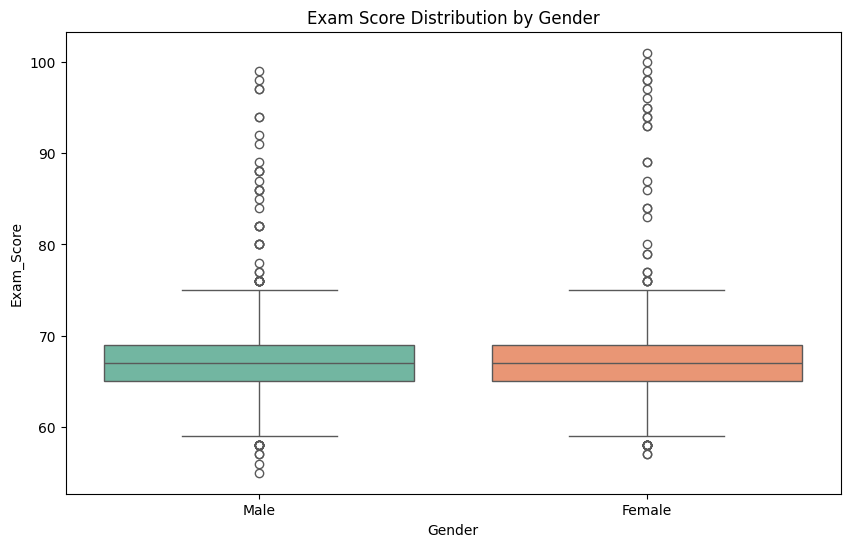

In [ ]:
# Box Plot para comparar el puntaje de los 2 géneros

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Gender', y='Exam_Score', palette='Set2')
plt.title('Exam Score Distribution by Gender')
plt.show()

**Podemos observar que no hay una diferencia muy marcada entre hombres y mujeres en rendimiento, las mujeres suelen tener ligeramente mejores calificaciones, pero no lo suficiente para ser relevante para nuestro análisis.**

**Análisis Multivariado**

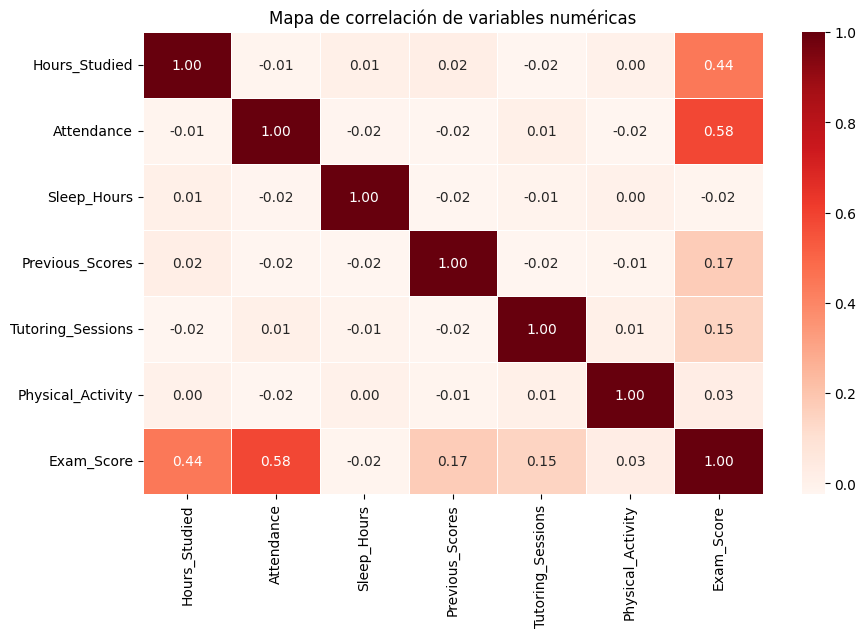

In [ ]:
#Aqui comparamos todas las variables numéricas en un mapa de correlación
numerical_features = df[['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']]
correlation_matrix = numerical_features.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Reds', fmt='.2f', linewidths=0.5)
plt.title("Mapa de correlación de variables numéricas")
plt.show()

**Del mapa de correlación podemos deducir que ninguna variable tiene una correlación perfecta, pero que la cantidad de horas de estudio y la asistencia a clases son las variables con una correlación positiva mayor.**

**De la misma forma, la actividad física y la cantidad de horas de sueño parece no tener ningun tipo de correlación con las calificaciones**

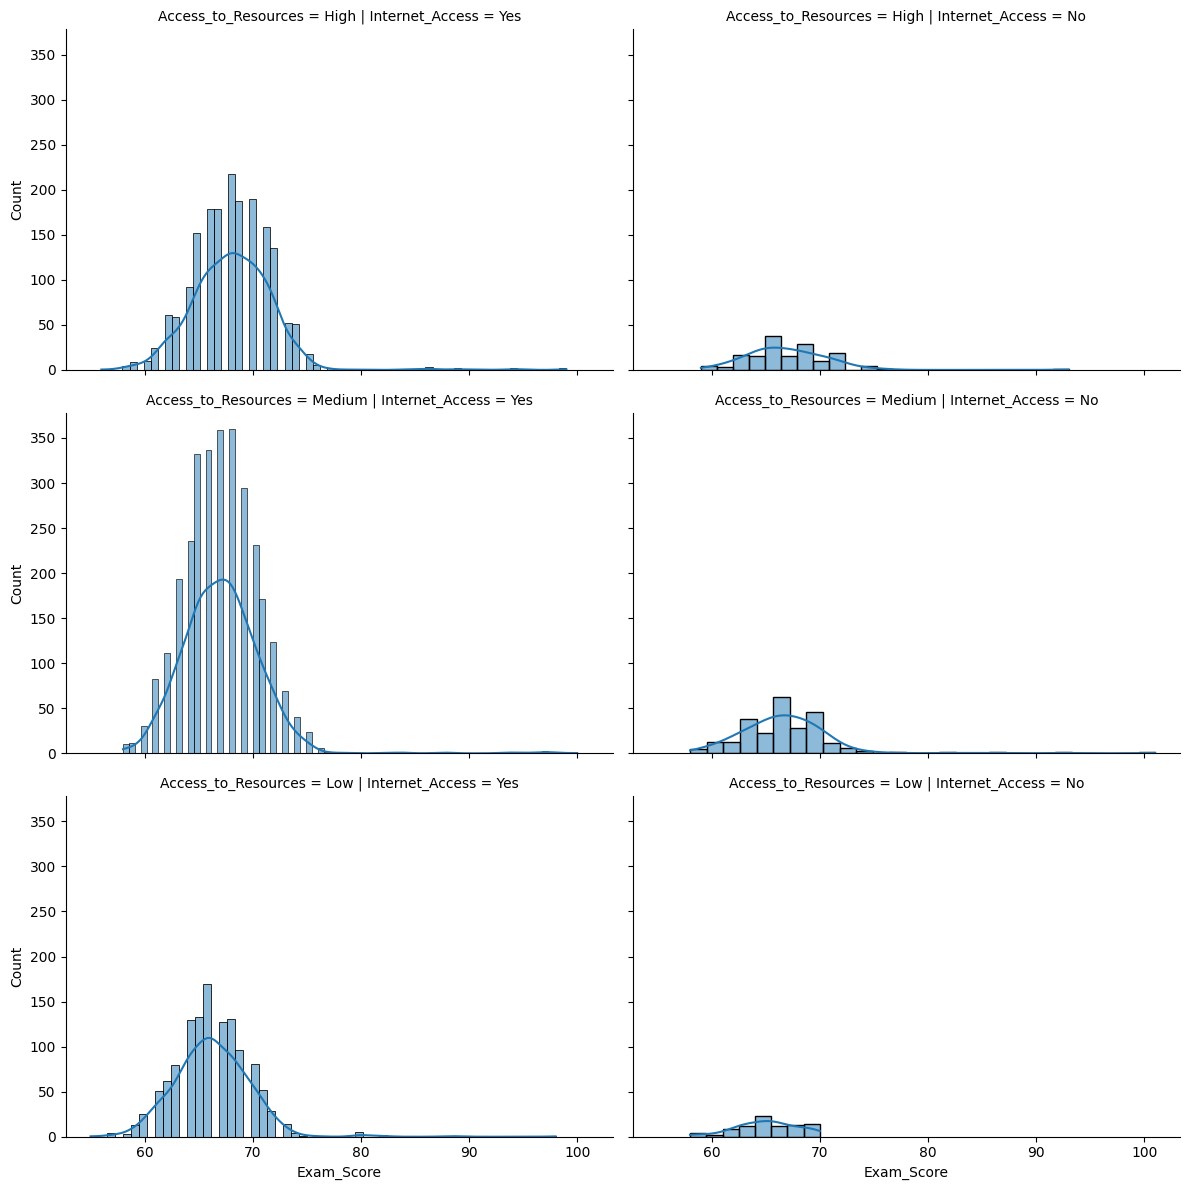

In [ ]:
g = sns.FacetGrid(df, col="Internet_Access", row="Access_to_Resources", height=4, aspect=1.5)
g.map_dataframe(sns.histplot, x="Exam_Score", kde=True)
plt.show()


**En cuanto a recursos, la mayoria de los estudiantes tenian acceso a internet y a recursos. Las calificaciones fueron bastante parejas pero el grupo que tiene las mejores notas, con su mayoria cerca de 70, son los estudiantes con acceso a internet y acceso medio a recursos**

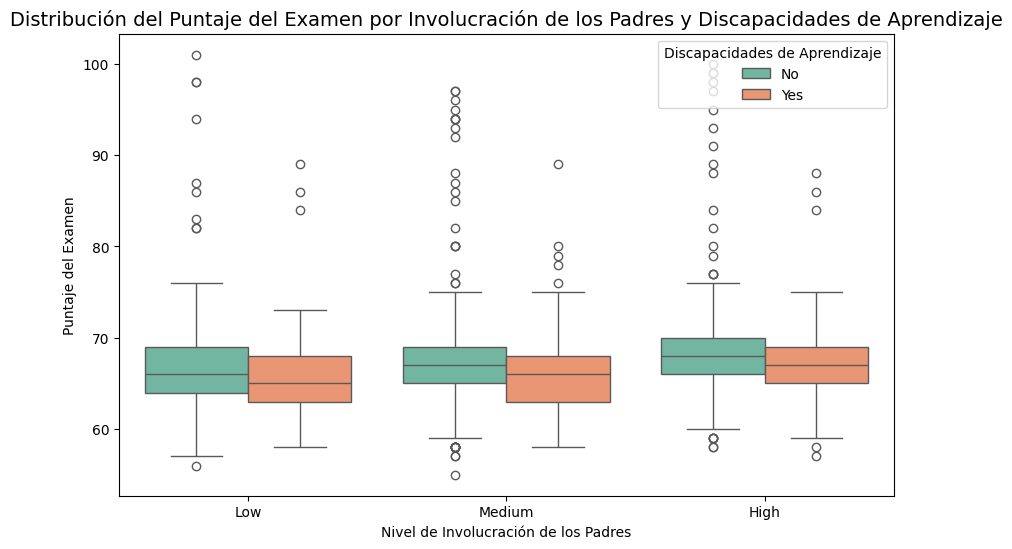

In [ ]:
# Boxplot para comparar las calificaciones de estudiantes con y sin discapacidades y la involucración de los padres

plt.figure(figsize=(10, 6))
sns.boxplot(
    x="Parental_Involvement",
    y="Exam_Score",
    hue="Learning_Disabilities",
    data=df,
    palette="Set2",
    order=["Low", "Medium", "High"]
)

plt.title("Distribución del Puntaje del Examen por Involucración de los Padres y Discapacidades de Aprendizaje", fontsize=14)
plt.xlabel("Nivel de Involucración de los Padres")
plt.ylabel("Puntaje del Examen")
plt.legend(title="Discapacidades de Aprendizaje", loc="upper right")
plt.show()

Este gráfico muestra que, aunque los estudiantes con discapacidades de aprendizaje tienen calificaciones ligeramente más bajas en comparación con aquellos sin discapacidades, ambos grupos se ven influenciados por el nivel de involucramiento de los padres. En ambos casos, se observa un promedio más alto y una mayor cantidad de estudiantes con calificaciones sobresalientes cuando los padres están más involucrados en el proceso educativo.

# Transformación de Datos Pre-modelado

Para entrenar el modelo voy a convertir los datos categoricos en numéricos.

**Para datos con 3 valores como Low/Medium/High probé usar OrdinalEncoder inicialmente, pero siguiendo el feedback de mi tutor voy a usar One-Hot Encoding para todo, buscando evitar generarle confusión innecesaria al modelo con rankings**

In [ ]:
# Lista de columnas categóricas
categorical_columns = [
    'Parental_Involvement', 'Access_to_Resources', 'Motivation_Level',
    'Family_Income', 'Teacher_Quality', 'Peer_Influence',
    'Parental_Education_Level', 'Distance_from_Home',
    'Extracurricular_Activities', 'Internet_Access',
    'School_Type', 'Learning_Disabilities', 'Gender'
]

# Aplicar One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Ver registros para confirmar
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Peer_Influence_Positive,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes,Gender_Male
0,23,84,7,73,0,3,67,True,False,False,...,True,True,False,False,True,False,True,True,False,True
1,19,64,8,59,2,4,61,True,False,False,...,False,False,False,True,False,False,True,True,False,False
2,24,98,7,91,2,4,74,False,True,False,...,False,False,True,False,True,True,True,True,False,True
3,29,89,8,98,1,4,71,True,False,False,...,False,True,False,True,False,True,True,True,False,True
4,19,92,6,65,3,4,70,False,True,False,...,False,False,False,False,True,True,True,True,False,False


Me deshago de "Gender" ya que no es relevante para mi análisis y no quiero distinción de género.

In [ ]:
# 1. Eliminar la columna "Gender"
df = df.drop(columns=['Gender_Male'])

# Ver para confirmar los cambios
df.head()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score,Parental_Involvement_Low,Parental_Involvement_Medium,Access_to_Resources_Low,...,Peer_Influence_Neutral,Peer_Influence_Positive,Parental_Education_Level_High School,Parental_Education_Level_Postgraduate,Distance_from_Home_Moderate,Distance_from_Home_Near,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Learning_Disabilities_Yes
0,23,84,7,73,0,3,67,True,False,False,...,False,True,True,False,False,True,False,True,True,False
1,19,64,8,59,2,4,61,True,False,False,...,False,False,False,False,True,False,False,True,True,False
2,24,98,7,91,2,4,74,False,True,False,...,True,False,False,True,False,True,True,True,True,False
3,29,89,8,98,1,4,71,True,False,False,...,False,False,True,False,True,False,True,True,True,False
4,19,92,6,65,3,4,70,False,True,False,...,True,False,False,False,False,True,True,True,True,False


# Modelos

Usando validación cruzada, entrené varios modelos y los evaluamos para encontrar el mas exitoso. Aunque no en todos suele ser necesario el escalado, lo hago en todos para tener resultados mas consistentes y poder comparar mejor entre modelos.

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_validate
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

# Regresión Lineal

In [ ]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

# Definir K-Fold (5 pliegues)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Creamos el modelo de Regresión Lineal, que incluye el escalado de variables.
modelo_RL = Pipeline([
    ("scaler", StandardScaler()),
    ("lr", LinearRegression())
])

# Definir las métricas de evaluación:
scoring = {
    "R2": "r2",
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error"
}

# Realizar la validación cruzada
cv_results = cross_validate(modelo_RL, X, y, cv=kfold, scoring=scoring)

# Calcular los promedios de las métricas
mean_r2 = np.mean(cv_results["test_R2"])
mean_mae = -np.mean(cv_results["test_MAE"])
mean_rmse = -np.mean(cv_results["test_RMSE"])

print("Evaluación de Regresión Lineal:")
print(f"Mean R²: {mean_r2:.3f}")
print(f"Mean MAE: {mean_mae:.3f}")
print(f"Mean RMSE: {mean_rmse:.3f}")

Evaluación de Regresión Lineal:
Mean R²: 0.729
Mean MAE: 0.483
Mean RMSE: 1.993


La regresión lineal nos dió resultados decentes. Según el R2 llegamos a predecir casi un 73%, y según MAE y RMSE los errores en promedio no se alejan mucho del valor real, teniendo en cuenta que la escala de "exam score" es de 0 a 100

# Random Forest

In [ ]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

# Definir K-Fold (5 pliegues)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Creamos el modelo Random Forest
modelo_RF = Pipeline([
    ("scaler", StandardScaler()),
    ("rf", RandomForestRegressor(random_state=42))
])

# Definir las métricas de evaluación:
scoring = {
    "R2": "r2",
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error"
}

# Realizar la validación cruzada
cv_results = cross_validate(modelo_RF, X, y, cv=kfold, scoring=scoring)

# Calcular los promedios de las métricas
mean_r2 = np.mean(cv_results["test_R2"])
mean_mae = -np.mean(cv_results["test_MAE"])
mean_rmse = -np.mean(cv_results["test_RMSE"])

print("Evaluación de Random Forest:")
print(f"Mean R²: {mean_r2:.3f}")
print(f"Mean MAE: {mean_mae:.3f}")
print(f"Mean RMSE: {mean_rmse:.3f}")

Evaluación de Random Forest:
Mean R²: 0.613
Mean MAE: 1.209
Mean RMSE: 2.394


Random Forest obtuvo los peores resultados

## XGBoost

In [ ]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

# Definir K-Fold (5 pliegues)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Crear el modelo de XGBRegressor
modelo_XGB = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", XGBRegressor(random_state=42, verbosity=0))
])

# Definir las métricas de evaluación:
scoring = {
    "R2": "r2",
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error"
}

# Realizar la validación cruzada
cv_results = cross_validate(modelo_XGB, X, y, cv=kfold, scoring=scoring)

# Calcular los promedios de las métricas
mean_r2 = np.mean(cv_results["test_R2"])
mean_mae = -np.mean(cv_results["test_MAE"])
mean_rmse = -np.mean(cv_results["test_RMSE"])

print("Evaluación de XGBoost:")
print(f"Mean R²: {mean_r2:.3f}")
print(f"Mean MAE: {mean_mae:.3f}")
print(f"Mean RMSE: {mean_rmse:.3f}")

Evaluación de XGBoost:
Mean R²: 0.640
Mean MAE: 0.990
Mean RMSE: 2.305


XGBoost no tuvo buenos resultados, pero intentaré mejorarlo con hiperparametros

In [ ]:
from sklearn.model_selection import GridSearchCV
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

pipeline_xgb = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", XGBRegressor(random_state=42, verbosity=0))
])

# Definir parámetros a probar para XGboost
param_grid = {
    "xgb__n_estimators": [50, 100, 200],
    "xgb__max_depth": [3, 5, 7],
    "xgb__learning_rate": [0.01, 0.1, 0.2],
    "xgb__subsample": [0.8, 1.0],
    "xgb__colsample_bytree": [0.8, 1.0],
    "xgb__reg_alpha": [0, 0.1, 1],
    "xgb__reg_lambda": [1, 1.5, 2]
}

# K-Fold (5 pliegues) de nuevo
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Configurar el GridSearchCV para encontrar la mejor combinación de parámetros
grid_search_xgb = GridSearchCV(pipeline_xgb, param_grid, cv=kfold, scoring="r2", n_jobs=-1)
grid_search_xgb.fit(X, y)

print("Mejores parámetros encontrados para XGBoost:", grid_search_xgb.best_params_)
print("Mejor R² en validación:", grid_search_xgb.best_score_)

Mejores parámetros encontrados para XGBoost: {'xgb__colsample_bytree': 0.8, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__n_estimators': 200, 'xgb__reg_alpha': 1, 'xgb__reg_lambda': 2, 'xgb__subsample': 0.8}
Mejor R² en validación: 0.7127185344696045


In [ ]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Crear el pipelinecon los parámetros óptimos encontrados
modelo_XGB_final = Pipeline([
    ("scaler", StandardScaler()),
    ("xgb", XGBRegressor(
        colsample_bytree=0.8,
        learning_rate=0.1,
        max_depth=3,
        n_estimators=200,
        reg_alpha=1,
        reg_lambda=2,
        subsample=0.8,
        random_state=42,
        verbosity=0
    ))
])

scoring = {
    "R2": "r2",
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error"
}

cv_results_final = cross_validate(modelo_XGB_final, X, y, cv=kfold, scoring=scoring)

mean_r2_final = np.mean(cv_results_final["test_R2"])
mean_mae_final = -np.mean(cv_results_final["test_MAE"])
mean_rmse_final = -np.mean(cv_results_final["test_RMSE"])

print("Evaluación final de XGBoost con hiperparámetros óptimos:")
print(f"Mean R²: {mean_r2_final:.3f}")
print(f"Mean MAE: {mean_mae_final:.3f}")
print(f"Mean RMSE: {mean_rmse_final:.3f}")

Evaluación final de XGBoost con hiperparámetros óptimos:
Mean R²: 0.713
Mean MAE: 0.655
Mean RMSE: 2.055


Mejoró considerablemente pero aun no llega a ser mejor que la regresión lineal

# Support Vector Regression (SVR)

In [ ]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

# Definir K-Fold con 5 pliegues
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Crear el modelo SVR
modelo_SVR = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

# Definir las métricas de evaluación:
scoring = {
    "R2": "r2",
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error"
}

# Realizar la validación cruzada con los 5 pliegues
cv_results = cross_validate(modelo_SVR, X, y, cv=kfold, scoring=scoring)

# Calcular los promedios de las métricas
mean_r2 = np.mean(cv_results["test_R2"])
mean_mae = -np.mean(cv_results["test_MAE"])
mean_rmse = -np.mean(cv_results["test_RMSE"])

print("Evaluación de SVR:")
print(f"Mean R²: {mean_r2:.3f}")
print(f"Mean MAE: {mean_mae:.3f}")
print(f"Mean RMSE: {mean_rmse:.3f}")

Evaluación de SVR:
Mean R²: 0.719
Mean MAE: 0.549
Mean RMSE: 2.033


Con SVR tuvimos resultados decentes, bastante parecidos a los que regresión lineal, por lo que voy a intentar hacer un ajuste de hiperparámetros a ver si con eso puedo mejorarlo

In [ ]:
from sklearn.model_selection import GridSearchCV

X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

# Crear SVR
pipeline_svr = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

# Definir grid de parámetros
param_grid = {
    "svr__C": [0.1, 1, 10, 100],
    "svr__epsilon": [0.1, 0.2, 0.5, 1],
    "svr__kernel": ["rbf", "linear"],
    "svr__gamma": ["scale", "auto"]
}

# Definir KFold (5 pliegues)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Configurar GridSearchCV
grid_search = GridSearchCV(pipeline_svr, param_grid, cv=kfold, scoring="r2", n_jobs=-1)
grid_search.fit(X, y)

print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor R² en validación:", grid_search.best_score_)

Mejores parámetros encontrados: {'svr__C': 100, 'svr__epsilon': 0.5, 'svr__gamma': 'scale', 'svr__kernel': 'linear'}
Mejor R² en validación: 0.7296298043444576


Aunque la diferencia en R2 no parece que vaya a ser grande, voy a intentar volver a entrenar SVR usando estos mejores parámetros encontrados

In [ ]:
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_validate

X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

# K-Fold (5 pliegues)
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Entrenar SVR utilizando los parámetros óptimos encontrados
modelo_SVR_final = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR(C=100, epsilon=0.5, gamma="scale", kernel="linear"))
])

# Definir las métricas de evaluación:
scoring = {
    "R2": "r2",
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error"
}

# Validación cruzada
cv_results_final = cross_validate(modelo_SVR_final, X, y, cv=kfold, scoring=scoring)

# Calcular los promedios de las métricas
mean_r2_final = np.mean(cv_results_final["test_R2"])
mean_mae_final = -np.mean(cv_results_final["test_MAE"])
mean_rmse_final = -np.mean(cv_results_final["test_RMSE"])

print("Evaluación final de SVR con parámetros óptimos:")
print(f"Mean R²: {mean_r2_final:.3f}")
print(f"Mean MAE: {mean_mae_final:.3f}")
print(f"Mean RMSE: {mean_rmse_final:.3f}")

Evaluación final de SVR con parámetros óptimos:
Mean R²: 0.730
Mean MAE: 0.441
Mean RMSE: 1.991


SVR: Las 3 métricas mejoraron gracias a haber usado los mejores parámetros.

# Lasso

Para un dataset como este también sugirieron en clase investigar Lasso, por lo que ahora intentaré con ese tambien, que es basicamente un tipo de regresión lineal que usa una técnica de regularización para mejorar la precisión de las predicciones

In [ ]:
from sklearn.linear_model import Lasso, LassoCV
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]

# K-Fold con 5 pliegues
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Primero, encontraremos el mejor valor de alpha usando LassoCV
# Escalamos los datos temporalmente para LassoCV
scaler_temp = StandardScaler()
X_scaled = scaler_temp.fit_transform(X)

lasso_cv = LassoCV(cv=kfold, random_state=42)
lasso_cv.fit(X_scaled, y)
best_alpha = lasso_cv.alpha_
print("Mejor valor de alpha encontrado por LassoCV:", best_alpha)

# Crear el pipeline para el modelo Lasso con el alpha óptimo encontrado
modelo_lasso = Pipeline([
    ("scaler", StandardScaler()),
    ("lasso", Lasso(alpha=best_alpha))
])

# Métricas de evaluación:
scoring = {
    "R2": "r2",
    "MAE": "neg_mean_absolute_error",
    "RMSE": "neg_root_mean_squared_error"
}

# Validación cruzada
cv_results = cross_validate(modelo_lasso, X, y, cv=kfold, scoring=scoring)

mean_r2 = np.mean(cv_results["test_R2"])
mean_mae = -np.mean(cv_results["test_MAE"])
mean_rmse = -np.mean(cv_results["test_RMSE"])

print("Evaluación de Lasso:")
print(f"Mean R²: {mean_r2:.3f}")
print(f"Mean MAE: {mean_mae:.3f}")
print(f"Mean RMSE: {mean_rmse:.3f}")

Mejor valor de alpha encontrado por LassoCV: 0.0022488119939167595
Evaluación de Lasso:
Mean R²: 0.729
Mean MAE: 0.483
Mean RMSE: 1.993


Los resultados de Lasso son exactamente iguales a los de la regresión lineal común por lo que es probable que al haber encontrado un "best alpha" tan bajo no haya hecho cambios significantes

# Comparación y decisiones

Resumen de resultados:
                     R²    MAE   RMSE
Regresión Lineal  0.729  0.483  1.993
Random Forest     0.613  1.209  2.394
XGBoost Mejorado  0.713  0.655  2.055
SVR Mejorado      0.730  0.441  1.991
Lasso             0.729  0.483  1.993


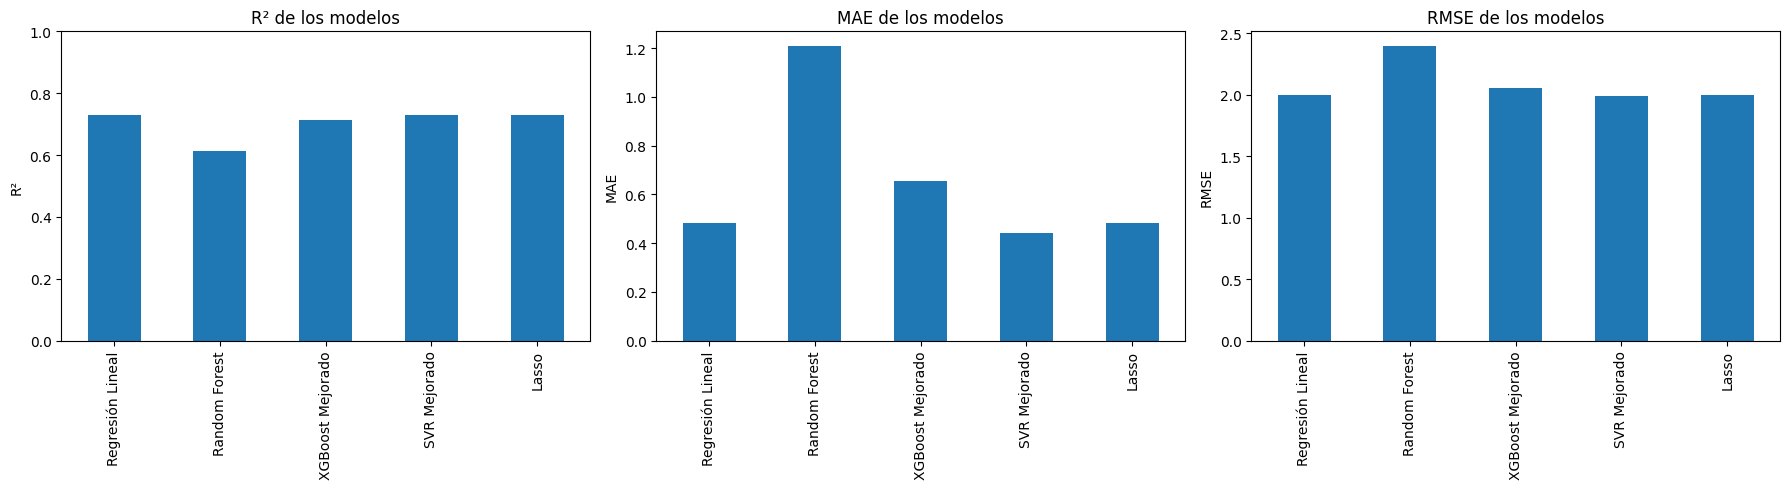

In [ ]:
# Valores que obtuve en cada modelo
resultados = {
    "Regresión Lineal": {"R²": 0.729, "MAE": 0.483, "RMSE": 1.993},
    "Random Forest": {"R²": 0.613, "MAE": 1.209, "RMSE": 2.394},
    "XGBoost Mejorado": {"R²": 0.713, "MAE": 0.655, "RMSE": 2.055},
    "SVR Mejorado": {"R²": 0.730, "MAE": 0.441, "RMSE": 1.991},
    "Lasso": {"R²": 0.729, "MAE": 0.483, "RMSE": 1.993}
}

# Convertir el diccionario a un DataFrame para tener una vista tabulada
df_resultados = pd.DataFrame(resultados).T
print("Resumen de resultados:")
print(df_resultados)

# Resultados en gráficos de barras para cada métrica
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Gráfico para R²
df_resultados["R²"].plot(kind="bar", ax=axs[0], title="R² de los modelos")
axs[0].set_ylabel("R²")
axs[0].set_ylim(0, 1)  # R² siempre entre 0 y 1

# Gráfico para MAE
df_resultados["MAE"].plot(kind="bar", ax=axs[1], title="MAE de los modelos")
axs[1].set_ylabel("MAE")

# Gráfico para RMSE
df_resultados["RMSE"].plot(kind="bar", ax=axs[2], title="RMSE de los modelos")
axs[2].set_ylabel("RMSE")

plt.tight_layout()
plt.show()

Gracias al ajuste de hiperparámetros, XGBoost mejoró considerablemente, aunque aún no alcanza el desempeño de los otros modelos. En comparación, la regresión lineal y el SVR se destacaron, siendo este último, que contó con un refinamiento adicional, ligeramente superior a pesar de su mayor complejidad. Con un R² del 73%, la capacidad predictiva es notable, aunque no perfecta; sin embargo, con un análisis más profundo y mayor experiencia, es factible optimizar aún más el modelo. Además, estamos lejos del overfitting, lo que abre la puerta a futuras mejoras.

#**Conclusiones**

El análisis mostró que las horas de estudio y la asistencia a clases se correlacionan positivamente con las calificaciones, mientras que la motivación, el género, el sueño y la actividad física no resultaron determinantes. Además, un acceso medio a recursos, buena conectividad y un mayor involucramiento parental, especialmente en estudiantes con discapacidades de aprendizaje, se asocian a un mejor desempeño.

Estos hallazgos constituyen una base sólida para desarrollar un modelo de regresión que no solo prediga el rendimiento académico, sino que también permita optimizar de manera efectiva las estrategias educativas.

Tras evaluar varios modelos, se eligió el SVR, ya que mostró un desempeño ligeramente superior a los demás con un R² del 73% y sin incurrir en overfitting, ofreciendo un punto de partida prometedor para futuras mejoras.